<a href="https://colab.research.google.com/github/GrichinNikita2019/yandex_praktikum_da/blob/main/determination_of_perspective_tariff/determination_of_perspective_tariff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов:**

**Тариф «Смарт»**

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 3 рубля

сообщение: 3 рубля

1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 1 рубль

сообщение: 1 рубль

1 Гб интернет-трафика: 150 рублей


**Задачей проекта является поиск ответов на следующие вопросы:**
1. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
2. Различаются ли средняя выручка пользователей тарифов «Ультра» и «Смарт»?
3. Различаются ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов?

**План работы:**
1. Шаг 1. Открыть файлы с данными и изучить общую информацию
2. Шаг 2. Осуществить предобработку данных (обработать пропуски, заменить типы данных)
3. Шаг 3. Ответить на вопросы, поставленные в задачах
4. Шаг 4. Сформулировать общий вывод

**Описание данных в таблице users:**

* user_id — *уникальный идентификатор пользователя*
* first_name — *имя пользователя*
* last_name — *фамилия пользователя*
* age — *возраст пользователя (годы)*
* reg_date — *дата подключения тарифа (день, месяц, год)*
* churn_date — *дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)*
* city — *город проживания пользователя*
* tariff — *название тарифного плана*

**Описание данных в таблице calls:**

* id — *уникальный номер звонка*
* call_date — *дата звонка*
* duration — *длительность звонка в минутах*
* user_id — *идентификатор пользователя, сделавшего звонок*

**Описание данных в таблице messages:**

* id — *уникальный номер сообщения*
* message_date — *дата сообщения*
* user_id — *идентификатор пользователя, отправившего сообщение*

**Описание данных в таблице internet:**

* id — *уникальный номер сессии*
* mb_used — *объём потраченного за сессию интернет-трафика (в мегабайтах)*
* session_date — *дата интернет-сессии*
* user_id — *идентификатор пользователя*

**Описание данных в таблице tariffs:**

* tariff_name — *название тарифа*
* rub_monthly_fee — *ежемесячная абонентская плата в рублях*
* minutes_included — *количество минут разговора в месяц, включённых в абонентскую плату*
* messages_included — *количество сообщений в месяц, включённых в абонентскую плату*
* mb_per_month_included — *объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)*
* rub_per_minute — *стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)*
* rub_per_message — *стоимость отправки сообщения сверх тарифного пакета*
* rub_per_gb — *стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)*

## Изучение данных из файла

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from datetime import datetime
from scipy import stats as st
import warnings

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
plt.style.use('dark_background')
warnings.filterwarnings('ignore')

In [ ]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
tariffs = pd.read_csv('/datasets/tariffs.csv')

### Изучение таблицы users

In [ ]:
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
333,1333,58,NaN,Москва,Вера,Антонова,2018-09-28,ultra
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart
224,1224,58,NaN,Магнитогорск,Ахмет,Тарасов,2018-04-24,smart
412,1412,63,NaN,Волгоград,Геодар,Афонин,2018-06-05,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
248,1248,51,NaN,Москва,Анатолий,Минаев,2018-05-28,smart
87,1087,50,NaN,Санкт-Петербург,Гелена,Абалакова,2018-10-03,smart
336,1336,27,NaN,Уфа,Авксентий,Алексеичев,2018-12-31,ultra
478,1478,75,NaN,Грозный,Таира,Константинова,2018-07-16,smart
296,1296,60,NaN,Москва,Альфред,Черный,2018-06-05,smart


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропуски есть только в переменной churn_date (38 пропусков). В нашем случае пропуски по этой переменной это адекватно - если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Необходимо только заменить типы данных для переменных 'churn_date' и 'reg_date' на datetime.

In [ ]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [ ]:
users.duplicated().sum()

0

Дубликатов в таблице нет!

Готово!

### Изучение таблицы calls

In [ ]:
calls.sample(10)

,id,call_date,duration,user_id
132951,1341_181,2018-08-29,4.710,1341
148121,1375_952,2018-10-18,11.350,1375
171365,1424_12,2018-11-13,6.220,1424
198558,1488_20,2018-12-12,12.400,1488
192974,1472_787,2018-09-22,3.290,1472
142222,1360_665,2018-03-20,2.900,1360
6120,1017_316,2018-07-16,5.270,1017
170578,1421_141,2018-06-06,2.450,1421
129275,1331_171,2018-05-21,0.000,1331
176537,1435_455,2018-12-26,0.000,1435


In [ ]:
calls.describe()

,duration,user_id
count,202607.000,202607.000
mean,6.756,1253.941
std,5.843,144.723
min,0.000,1000.000
25%,1.300,1126.000
50%,6.000,1260.000
75%,10.700,1379.000
max,38.000,1499.000


In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропусков в данных нет! Необходимо только изменить тип данных на datetime для переменной 'call_date' и на int для переменной 'id' для однообразия (другие переменные с id у нас принадлежат к типу данных int).

**Обратите внимание:** «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Поэтому переменную "duration" (длительность звонка в минутах) следуют округлить вверх.

In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

In [ ]:
calls['id'] = calls['id'].astype('int')

In [ ]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [ ]:
calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000


In [ ]:
calls['duration'].value_counts()

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64

Обратите внимание, что длительность многих звонков (39613)— 0.0 минут. Это могут быть пропущенные звонки. Предлагаем от них избавиться.

In [ ]:
calls = calls.drop(calls[calls['duration'] == 0].index)

In [ ]:
calls.describe()

,id,duration,user_id
count,162994.000,162994.000,162994.000
mean,1212659.511,8.898,1254.150
std,1728140.932,5.354,144.751
min,10002.000,1.000,1000.000
25%,1012247.250,5.000,1126.000
50%,1179350.500,8.000,1261.000
75%,1358214.750,12.000,1379.000
max,14581154.000,38.000,1499.000


In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null int64
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 MB


In [ ]:
calls['duration'].value_counts()

7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64

In [ ]:
calls.duplicated().sum()

0

Дубликатов в таблицах нет!

Типы данных поправили, удалили из датафрейма пропущенные звонки. Идем дальше!

### Изучение таблицы messages

In [ ]:
messages.sample(10)

,id,message_date,user_id
57883,1253_392,2018-08-19,1253
89601,1374_49,2018-10-16,1374
50054,1222_258,2018-09-13,1222
92435,1381_388,2018-12-02,1381
104375,1424_228,2018-09-28,1424
68310,1289_69,2018-09-06,1289
80654,1335_566,2018-09-04,1335
79256,1331_479,2018-12-30,1331
27822,1119_345,2018-07-14,1119
56569,1251_33,2018-06-05,1251


In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Аналогичным образом заменяем типы данных: на int в переменной 'id' и на datetime в 'message_date'.

In [ ]:
messages['id'] = messages['id'].astype('int')

In [ ]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


In [ ]:
messages.duplicated().sum()

0

Дубликатов в таблицах нет!

Готово!

### Изучение таблицы internet

In [ ]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.950,2018-11-25,1000
1,1000_1,1052.810,2018-09-07,1000
2,1000_2,1197.260,2018-06-25,1000
3,1000_3,550.270,2018-08-22,1000
4,1000_4,302.560,2018-09-24,1000


In [ ]:
internet.describe()

,mb_used,user_id
count,149396.000,149396.000
mean,370.192,1252.100
std,278.301,144.051
min,0.000,1000.000
25%,138.188,1130.000
50%,348.015,1251.000
75%,559.553,1380.000
max,1724.830,1499.000


In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Пропусков в данных нет.

Заменим типы данных в переменных: на int для переменной 'id', на datetime для переменной 'session_date' и округлим значения в переменной "mb_used".

In [ ]:
internet['id'] = internet['id'].astype('int')

In [ ]:
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')

In [ ]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null int64
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.7 MB


In [ ]:
internet['mb_used'].value_counts()

0       19598
333       231
382       228
377       224
334       222
        ...  
1495        1
1624        1
1371        1
1423        1
1279        1
Name: mb_used, Length: 1424, dtype: int64

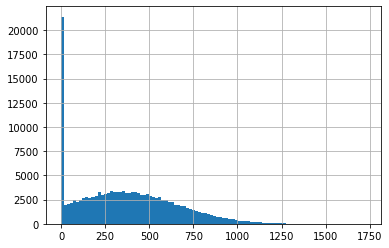

In [ ]:
internet['mb_used'].hist(bins=100)
plt.show()

Также как со звонками, по количеству использованных МБ также наблюдается большая доля нулевых значений. Однако в отличие от звонков, где нулевые значения могли означать пропущенные звонки, нулевые МБ, мне кажется, это нормально. Не все люди используют мобильный интернет, например, некоторые представители старшего поколения, которым телефон нужен только для звонков (надеюсь, не слишком кидаюсь стереотипами). Или люди, которые работают из дома, могут пользоваться вайфаем, а не расходовать мобильный интернет. В общем, на самом деле, мне кажется, естественных причин, по которым могут быть нулевые МБ, множество. Однако, судя по гистограмме, нулевых значений как-то аномально много, поэтому лучше такую аномалию удалить также как мы удалили нулевые звонки. 

In [ ]:
internet = internet.drop(internet[internet['mb_used'] == 0].index)

In [ ]:
internet['mb_used'].value_counts()

333     231
382     228
377     224
253     222
334     222
       ... 
1324      1
1230      1
1624      1
1222      1
1279      1
Name: mb_used, Length: 1423, dtype: int64

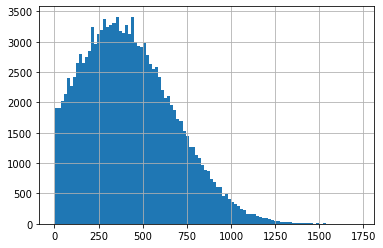

In [ ]:
internet['mb_used'].hist(bins=100)
plt.show()

Готово! Распределение стало красивее)

In [ ]:
internet.duplicated().sum()

0

Дубликатов в таблице нет!

### Изучение таблицы tariffs

In [ ]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [ ]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


С таблицей все в порядке!

## Подготовка данных (объединение таблиц)

### Количество сделанных звонков и израсходованных минут разговора по месяцам

Необходимо посчитать **количество сделанных звонков и израсходованных минут разговора по месяцам**. Для этого для начала вычленим из переменной 'call_date' новую переменную с месяцем.

In [ ]:
calls['month'] = calls['call_date'].dt.month

In [ ]:
calls.head()

,id,call_date,duration,user_id,month
2,10002,2018-06-11,3,1000,6
3,10003,2018-09-21,14,1000,9
4,10004,2018-12-15,6,1000,12
7,10007,2018-08-22,19,1000,8
8,10008,2018-09-15,19,1000,9


In [ ]:
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})\

In [ ]:
user_calls.head()

,user_id,month,month_calls_duration,calls_total_in_month
0,1000,5,159,17
1,1000,6,172,28
2,1000,7,340,41
3,1000,8,408,42
4,1000,9,466,46


### Количество отправленных сообщений по месяцам

Для подсчета количества отправленных сообщений по месяцам произведем аналогичные действия.

In [ ]:
messages['month'] = messages['message_date'].dt.month

In [ ]:
messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12


In [ ]:
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total_in_month'})

In [ ]:
user_messages.head()

,user_id,month,sms_total_in_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Объем израсходованного интернет-трафика по месяцам

Здесь также необходимо провести подобные манипуляции!

In [ ]:
internet['month'] = internet['session_date'].dt.month

In [ ]:
internet.head()

,id,mb_used,session_date,user_id,month
0,10000,113,2018-11-25,1000,11
1,10001,1053,2018-09-07,1000,9
2,10002,1198,2018-06-25,1000,6
3,10003,551,2018-08-22,1000,8
4,10004,303,2018-09-24,1000,9


In [ ]:
user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total_in_month'})

In [ ]:
user_internet.head()

,user_id,month,mb_total_in_month
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


In [ ]:
internet['session_date'].dt.year.value_counts()

2018    129798
Name: session_date, dtype: int64

### Помесячная выручка с каждого пользователя

Помесячная выручка с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Для того, чтобы посчитать помесячную выручку с каждого пользовател для начала необходимо объединить все таблицы в одну большую.

In [ ]:
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')

In [ ]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month
0,1000,5,159.000,17.000,22.000
1,1000,6,172.000,28.000,60.000
2,1000,7,340.000,41.000,75.000
3,1000,8,408.000,42.000,81.000
4,1000,9,466.000,46.000,57.000


In [ ]:
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
df.head(10)

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month
0,1000,5,159.000,17.000,22.000,2256.000
1,1000,6,172.000,28.000,60.000,23257.000
2,1000,7,340.000,41.000,75.000,14016.000
3,1000,8,408.000,42.000,81.000,14070.000
4,1000,9,466.000,46.000,57.000,14581.000
5,1000,10,350.000,44.000,73.000,14717.000
6,1000,11,338.000,37.000,58.000,14768.000
7,1000,12,333.000,38.000,70.000,9827.000
8,1001,11,430.000,45.000,nan,18452.000
9,1001,12,414.000,47.000,nan,14053.000


In [ ]:
data_frames = [user_calls, user_messages, user_internet]

In [ ]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id','month'],
                                            how='outer'), data_frames)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id                 3214 non-null int64
month                   3214 non-null int64
month_calls_duration    3168 non-null float64
calls_total_in_month    3168 non-null float64
sms_total_in_month      2717 non-null float64
mb_total_in_month       3201 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id                 3214 non-null int64
month                   3214 non-null int64
month_calls_duration    3168 non-null float64
calls_total_in_month    3168 non-null float64
sms_total_in_month      2717 non-null float64
mb_total_in_month       3201 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [ ]:
df_merged.head(10)

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month
0,1000,5,159.000,17.000,22.000,2256.000
1,1000,6,172.000,28.000,60.000,23257.000
2,1000,7,340.000,41.000,75.000,14016.000
3,1000,8,408.000,42.000,81.000,14070.000
4,1000,9,466.000,46.000,57.000,14581.000
5,1000,10,350.000,44.000,73.000,14717.000
6,1000,11,338.000,37.000,58.000,14768.000
7,1000,12,333.000,38.000,70.000,9827.000
8,1001,11,430.000,45.000,nan,18452.000
9,1001,12,414.000,47.000,nan,14053.000


In [ ]:
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.000,17.000,22.000,2256.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.000,28.000,60.000,23257.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.000,41.000,75.000,14016.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.000,42.000,81.000,14070.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.000,46.000,57.000,14581.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
user_id                 3214 non-null int64
month                   3214 non-null int64
month_calls_duration    3168 non-null float64
calls_total_in_month    3168 non-null float64
sms_total_in_month      2717 non-null float64
mb_total_in_month       3201 non-null float64
age                     3214 non-null int64
churn_date              187 non-null datetime64[ns]
city                    3214 non-null object
first_name              3214 non-null object
last_name               3214 non-null object
reg_date                3214 non-null datetime64[ns]
tariff                  3214 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(4)
memory usage: 351.5+ KB


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id                 3214 non-null int64
month                   3214 non-null int64
month_calls_duration    3168 non-null float64
calls_total_in_month    3168 non-null float64
sms_total_in_month      2717 non-null float64
mb_total_in_month       3201 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [ ]:
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.000,17.000,22.000,2256.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.000,28.000,60.000,23257.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.000,41.000,75.000,14016.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.000,42.000,81.000,14070.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.000,46.000,57.000,14581.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [ ]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
user_id,0
month,0
month_calls_duration,1.43
calls_total_in_month,1.43
sms_total_in_month,15.46
mb_total_in_month,0.4
age,0
churn_date,94.18
city,0
first_name,0


После объединения таблиц у нас появились пропуски в следующих переменных:

1. month_calls_duration (1.43%)
2. calls_total_in_month	(1.43%)
3. sms_total_in_month (15.46)
4. mb_total_in_month (0.34%)

Пропущенные значения появились в резултате слияния, потому что для строк одной таблицы не находились значения из другой. То есть, например, если определенный пользователь не совершал звонков или не отправлял смс. Поэтому логично предположить, что пустые значения этих переменных можно заполнить нулями.

In [ ]:
df['sms_total_in_month'] = df['sms_total_in_month'].fillna(0)
df['mb_total_in_month'] = df['mb_total_in_month'].fillna(0)
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_total_in_month'] = df['calls_total_in_month'].fillna(0)

In [ ]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
user_id,0
month,0
month_calls_duration,0
calls_total_in_month,0
sms_total_in_month,0
mb_total_in_month,0
age,0
churn_date,94.18
city,0
first_name,0


Все шикарно, с пустыми значениями покончено.

А теперь приступим к тому, ради чего сливали таблицы - посчитаем помесячную выручку с каждого пользователя.

***Вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану***

In [ ]:
def above_the_tariff(row):
    sms = (row['sms_total_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.ceil(((row['mb_total_in_month'] - row['mb_per_month_included']) / 1024)) * row['rub_per_gb']
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [ ]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.000,17.000,22.000,2256.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.000,28.000,60.000,23257.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.000,41.000,75.000,14016.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.000,42.000,81.000,14070.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.000,46.000,57.000,14581.000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [ ]:
df['above_the_tariff'] = df.apply(lambda x: above_the_tariff(x), axis=1)

In [ ]:
df['total_paid'] = df['rub_monthly_fee'] + df['above_the_tariff']

In [ ]:
df[['above_the_tariff', 'total_paid']].describe()

,above_the_tariff,total_paid
count,3214.000,3214.000
mean,553.532,1532.592
std,770.678,799.651
min,0.000,550.000
25%,0.000,750.000
50%,168.000,1667.500
75%,953.000,1950.000
max,6220.000,6770.000


Данные выглядят реалистично. Большая доля людей не выходит за границы лимитов своего тарифа, более половины респондентов превышает лимиты трафика не более, чем на 168 рублей.

## Анализ данных

### Длительность звонков

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [ ]:
df[df['tariff'] == 'smart']['month_calls_duration'].describe()

count   2229.000
mean     417.935
std      190.314
min        0.000
25%      282.000
50%      422.000
75%      545.000
max     1435.000
Name: month_calls_duration, dtype: float64

In [ ]:
df[df['tariff'] == 'ultra']['month_calls_duration'].describe()

count    985.000
mean     526.623
std      317.606
min        0.000
25%      284.000
50%      518.000
75%      752.000
max     1673.000
Name: month_calls_duration, dtype: float64

In [ ]:
df.groupby('tariff')\
  .agg({'month_calls_duration':['median','mean','var','std']})\
  .style.format("{:.2f}")

Половина всех звонков в месяц по тарифу "smart" длится от 282 до 545 минут.
Половина всех звонков в месяц по тарифу "ultra" длится от 284 до 752 минут. 

Средняя длительност звонка по тарифу "smart" равна 417.93 минут.
Средняя длительност звонка по тарифу "ultra" равна 526.62 минут.

В среднем абоненты тарифа "ultra" звонят приблизительно на 100 минут больше абонентов тарифа "smart" (медиана для "smart": 422 минуты, медиана для "ultra": 518 минут).

Дисперсия и стандартное отклонение на порядок выше по тарифу ultra, что свидетельствует о большем разбросе количества проговоренных минут среди абонентов тарифа ultra по сравнению с абонентами тарифа smart.

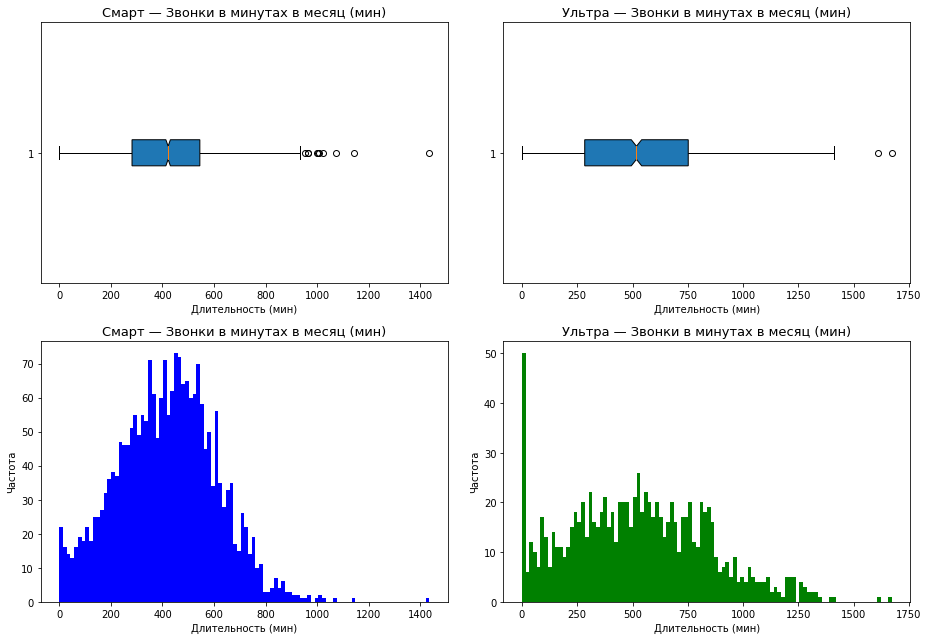

In [ ]:
fig = plt.figure(figsize=(13,9))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.title.set_text('Смарт — Звонки в минутах в месяц (мин)')
ax2.title.set_text('Ультра — Звонки в минутах в месяц (мин)')
ax3.title.set_text('Смарт — Звонки в минутах в месяц (мин)')
ax4.title.set_text('Ультра — Звонки в минутах в месяц (мин)')

ax1.title.set_color('black')
ax2.title.set_color('black')
ax3.title.set_color('black')
ax4.title.set_color('black')

ax1.title.set_size(13)
ax2.title.set_size(13)
ax3.title.set_size(13)
ax4.title.set_size(13)


ax1.set_xlabel('Длительность (мин)')

ax2.set_xlabel('Длительность (мин)')

ax3.set_xlabel('Длительность (мин)')
ax3.set_ylabel('Частота')

ax4.set_xlabel('Длительность (мин)')
ax4.set_ylabel('Частота')

fig.tight_layout()

ax1.boxplot(df[df['tariff'] == 'smart']['month_calls_duration'], notch=True, sym="o",vert=False, widths = 0.1, patch_artist = True);
ax2.boxplot(df[df['tariff'] == 'ultra']['month_calls_duration'], notch=True, sym="o",vert=False, widths = 0.1, patch_artist = True);
ax3.hist(df[df['tariff'] == 'smart']['month_calls_duration'], bins=100,color='blue');
ax4.hist(df[df['tariff'] == 'ultra']['month_calls_duration'], bins=100,color='green');


Распределение по звонкам в минутах в месяц для тарифа "smart" ближе к нормальному распределению. Графики отлично демонстрируют, почему у тарифа 'ultra' большая дисперсия: наблюдается большое количество значений сильно отклоняющихся от среднего (526.62), как в меньшую сторону (большое число звонков дляшихся не больше одной минуты, так и в большую - более длинный хвост справа. 

Экстримально высоких значений при этом больше в тарифе smart.

### Объём интернет-трафика

In [ ]:
df[df['tariff'] == 'smart']['mb_total_in_month'].describe()

count    2229.000
mean    16229.188
std      5877.577
min         0.000
25%     12658.000
50%     16531.000
75%     20068.000
max     38610.000
Name: mb_total_in_month, dtype: float64

In [ ]:
df[df['tariff'] == 'ultra']['mb_total_in_month'].describe()

count     985.000
mean    19486.902
std     10096.317
min         0.000
25%     11785.000
50%     19324.000
75%     26863.000
max     49789.000
Name: mb_total_in_month, dtype: float64

In [ ]:
df.groupby('tariff')\
  .agg({'mb_total_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

Половина абонентов расходуют в месяц по тарифу "smart" от 12658 до 20068 мб.
Половина абонентов расходуют в месяц по тарифу "ultra" от 11785 до 26863 мб.

Средний расход интернета в МБ по тарифу "smart" составлет 16229.188 МБ.
Средний расход интернета в МБ по тарифу "ultra" составлет 19486.902 МБ.

В среднем абоненты тарифа "ultra" расходуют приблизительно на 3000 мб больше абонентов тарифа "smart" (медиана для "smart": 16531 мб, медиана для "ultra": 19324 мб).

Дисперсия и стандартное отклонение также на порядок выше по тарифу ultra, что свидетельствует о большем разбросе количества израсходованного интернета среди абонентов тарифа ultra по сравнению с абонентами тарифа smart.

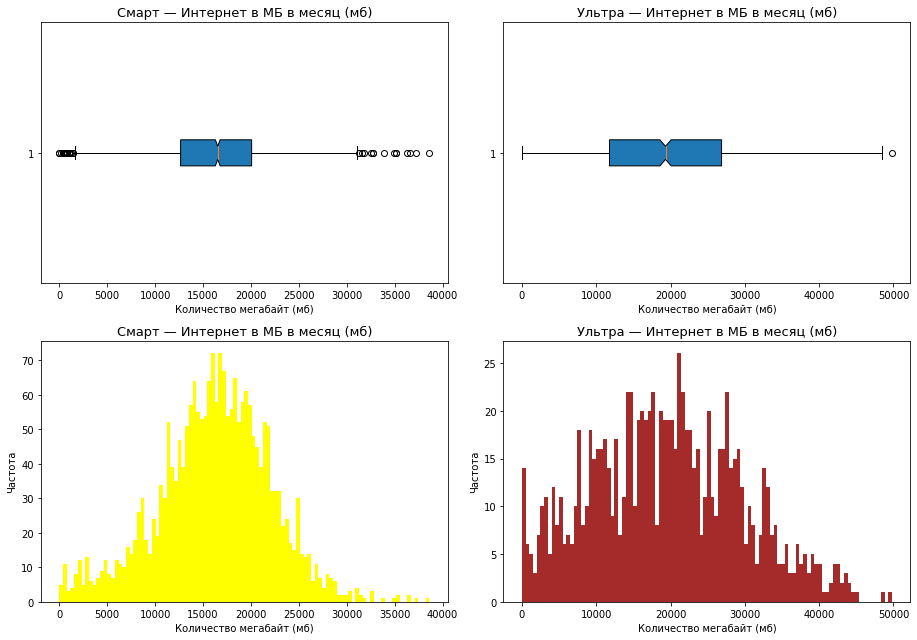

In [ ]:
fig = plt.figure(figsize=(13,9))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.title.set_text('Смарт — Интернет в МБ в месяц (мб)')
ax2.title.set_text('Ультра — Интернет в МБ в месяц (мб)')
ax3.title.set_text('Смарт — Интернет в МБ в месяц (мб)')
ax4.title.set_text('Ультра — Интернет в МБ в месяц (мб)')


ax1.title.set_color('black')
ax2.title.set_color('black')
ax3.title.set_color('black')
ax4.title.set_color('black')


ax1.title.set_size(13)
ax2.title.set_size(13)
ax3.title.set_size(13)
ax4.title.set_size(13)


ax1.set_xlabel('Количество мегабайт (мб)')

ax2.set_xlabel('Количество мегабайт (мб)')

ax3.set_xlabel('Количество мегабайт (мб)')
ax3.set_ylabel('Частота')

ax4.set_xlabel('Количество мегабайт (мб)')
ax4.set_ylabel('Частота')


fig.tight_layout()

ax1.boxplot(df[df['tariff'] == 'smart']['mb_total_in_month'], notch=True, sym="o",vert=False, widths = 0.1, patch_artist = True);
ax2.boxplot(df[df['tariff'] == 'ultra']['mb_total_in_month'], notch=True, sym="o",vert=False, widths = 0.1, patch_artist = True);
ax3.hist(df[df['tariff'] == 'smart']['mb_total_in_month'], bins=100,color='yellow');
ax4.hist(df[df['tariff'] == 'ultra']['mb_total_in_month'], bins=100,color='brown');

Распределение по мегабайтам в месяц для тарифа "smart" также ближе к нормальному распределению. Графики отлично демонстрируют, почему у тарифа 'ultra' большая дисперсия: наблюдается большое количество значений сильно отклоняющихся от среднего (19468.81) в меньшую сторону (большое количество практически неизрасходованного трафика)

В тарифе смарт опять большее количество экстримально высоких и экстримально низких значений!

### Количество сообщений

In [ ]:
df[df['tariff'] == 'smart']['sms_total_in_month'].describe()

count   2229.000
mean      33.384
std       28.228
min        0.000
25%       10.000
50%       28.000
75%       51.000
max      143.000
Name: sms_total_in_month, dtype: float64

In [ ]:
df[df['tariff'] == 'ultra']['sms_total_in_month'].describe()

count   985.000
mean     49.363
std      47.804
min       0.000
25%       6.000
50%      38.000
75%      79.000
max     224.000
Name: sms_total_in_month, dtype: float64

In [ ]:
df.groupby('tariff')\
  .agg({'sms_total_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

Половина абонентов отправляют в месяц по тарифу "smart" от 10 до 51 сообщения.
Половина абонентов отправляют в месяц по тарифу "ultra" от 6 до 79 сообщения.

Среднее количество сообщений в месяц для абонентов тарифа smart" составлет 28 (медиана).
Среднее количество сообщений в месяц для абонентов тарифа smart" составлет 38 (медиана).

В среднем абоненты тарифа "ultra" отправляют на 10 сообщений больше абонентов тарифа "smart" (медиана для "smart": 28 сообщений, медиана для "ultra": 38 сообщений).

Дисперсия и стандартное отклонение также на порядок выше по тарифу ultra, что свидетельствует о большем разбросе количества отправленных сообщений среди абонентов тарифа ultra по сравнению с абонентами тарифа smart.

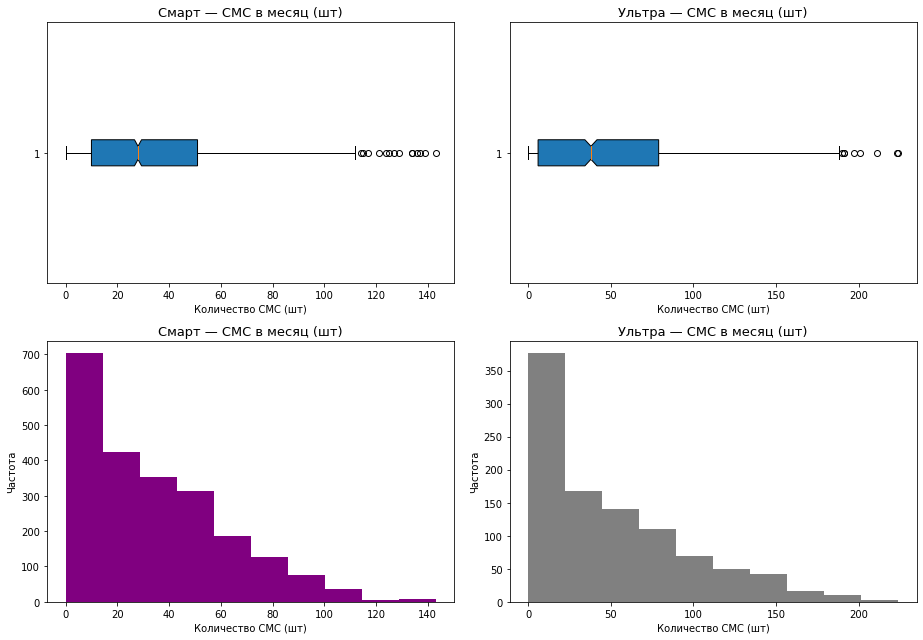

In [ ]:
fig = plt.figure(figsize=(13,9))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.title.set_text('Смарт — СМС в месяц (шт)')
ax2.title.set_text('Ультра — СМС в месяц (шт)')
ax3.title.set_text('Смарт — СМС в месяц (шт)')
ax4.title.set_text('Ультра — СМС в месяц (шт)')

ax1.title.set_color('black')
ax2.title.set_color('black')
ax3.title.set_color('black')
ax4.title.set_color('black')


ax1.title.set_size(13)
ax2.title.set_size(13)
ax3.title.set_size(13)
ax4.title.set_size(13)


ax1.set_xlabel('Количество СМС (шт)')

ax2.set_xlabel('Количество СМС (шт)')

ax3.set_xlabel('Количество СМС (шт)')
ax3.set_ylabel('Частота')

ax4.set_xlabel('Количество СМС (шт)')
ax4.set_ylabel('Частота')

fig.tight_layout()

ax1.boxplot(df[df['tariff'] == 'smart']['sms_total_in_month'], notch=True, sym="o",vert=False, widths = 0.1, patch_artist = True);
ax2.boxplot(df[df['tariff'] == 'ultra']['sms_total_in_month'], notch=True, sym="o",vert=False, widths = 0.1, patch_artist = True);
ax3.hist(df[df['tariff'] == 'smart']['sms_total_in_month'], bins=10,color='purple');
ax4.hist(df[df['tariff'] == 'ultra']['sms_total_in_month'], bins=10,color='grey');

Распределения по количеству СМС очень похожи по структуре.

Довольно интересный и для меня неожиданный результат. Тариф smart с более "демократичными" ценами привлекает большее количество 

In [ ]:
df[df['tariff'] == 'smart'].groupby(['tariff','month'] )\
  .agg({'month_calls_duration':['count','median','mean','var','std']})\
  .style.format("{:.2f}")

## Проверка гипотез

### Удаление выбросов

Напишем функцию, которая будет удалять экстримальные изначения из нашей выборки. Это нужно для того, чтобы выбросы не смазывали результаты применения тестов.

In [ ]:
def delete_outliers(df, column):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    return df.loc[iqr_test]

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается?

In [ ]:
alpha = 0.05

In [ ]:
ultra = df[df['tariff'] == 'ultra']
smart = df[df['tariff'] == 'smart']

In [ ]:
ultra = delete_outliers(ultra, 'total_paid')
ultra = ultra['total_paid']

In [ ]:
smart = delete_outliers(smart, 'total_paid')
smart = smart['total_paid']

Одно из условий применения теста Стьюдента: дисперсии подгрупп долны быть однородными. Для этого применяется критерий Левена.

Если **(p Levene) > 0.05**, то дисперсии подгрупп гомогенны

In [ ]:
tariff_levene = st.levene(ultra, smart)

In [ ]:
print('p-значение:', tariff_levene.pvalue)

if (tariff_levene.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве дисперсий: дисперсии не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу: дисперсии возможно равны")

p-значение: 8.737148565673266e-220
Отвергаем нулевую гипотезу о равенстве дисперсий: дисперсии не равны


**Гипотеза о равенстве средних двух генеральных совокупностей (для независимых выборок):**

H0 = средние по выручке для пользователей тарифов "Ультра" и "Смарт" равны (нет связи)

Так как мы показали, что дисперсии неоднородны, установим параметр equal_var=False

In [ ]:
results = st.ttest_ind(ultra, smart, equal_var=False)

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: есть разница между тарифами")
else:
    print("Не получилось отвергнуть нулевую гипотезу: возможно нет разницы между тарифами")

p-значение: 9.16596218444e-313
Отвергаем нулевую гипотезу: есть разница между тарифами


Разница не случайна, есть значимые различия между выборками, посмотрим на них подробнее!

In [ ]:
df.groupby('tariff')\
  .agg({'total_paid':['count','sum','median','mean','var','std']})\
  .style.format("{:.2f}")

- Тариф smart привлекает большее количество пользователей, возможно из-за более демократичных цен. Из-за большего количества абонентов общая выручка с тарифа smart на 41% больше, чем выручка с тарифа ultra.

- Несмотря на то, что пользователей тарифа "smart" в 2.3 раза больше, чем пользователей тарифа "ultra", они приносят на 60% больше выручки в среднем. Это статистически значимое отличие.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов?

Сначала нам необходимо создать новую переменную, которая бы принимала 2 значения: "Москва", "Другой регион"

In [ ]:
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [ ]:
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Другой регион')

In [ ]:
df['city'].value_counts()

Москва             611
Санкт-Петербург    270
Новосибирск         98
Уфа                 95
Краснодар           86
                  ... 
Сургут               6
Нижневартовск        6
Химки                5
Кемерово             5
Иваново              2
Name: city, Length: 76, dtype: int64

In [ ]:
df['region'].value_counts()

Другой регион    2603
Москва            611
Name: region, dtype: int64

Функция все правильно распределила!

**Гипотеза о равенстве средних двух генеральных совокупностей (для независимых выборок):**

H0 = средние по выручке для Москвы и других регионов равны (нет связи)

In [ ]:
moscow = df[df['region'] == 'Москва']
other_region = df[df['region'] == 'Другой регион']

In [ ]:
moscow = delete_outliers(moscow, 'total_paid')
moscow = moscow['total_paid']

In [ ]:
other_region = delete_outliers(other_region, 'total_paid')
other_region = other_region['total_paid']

In [ ]:
region_levene = st.levene(moscow, other_region)

In [ ]:
print('p-значение:', region_levene.pvalue)

if (tariff_levene.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве дисперсий: дисперсии не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу: дисперсии возможно равны")

p-значение: 0.017379989468225967
Отвергаем нулевую гипотезу о равенстве дисперсий: дисперсии не равны


Так как мы показали, что дисперсии неоднородны, установим параметр equal_var=False

In [ ]:
results = st.ttest_ind(moscow, other_region, equal_var=False)

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.25928546010201803
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть гипотезу о равенстве двух средних. Значимых различий нет. Но просто для любопытства предлагаю взглянуть на данные поближе. Средняя выручка в зависимости от региона значимо не отличаются!

In [ ]:
df.groupby('region')\
  .agg({'total_paid':['count','mean']})\
  .style.format("{:.2f}")

Да, тут и без теста Стьюдента видно, что средняя выручка в зависимости от региона почти не отличается!

## Общий вывод

**Тарифы "smart" и "ultra" отличается следующими особенностями:**
1. Половина всех звонков в месяц по тарифу "smart" длится от 282 до 545 минут.
2. Половина всех звонков в месяц по тарифу "ultra" длится от 284 до 752 минут.
3. Средняя длительност звонка по тарифу "smart" равна 417.93 минут.
4. Средняя длительност звонка по тарифу "ultra" равна 526.62 минут.
5. В среднем абоненты тарифа "ultra" звонят приблизительно на 100 минут больше абонентов тарифа "smart" (медиана для "smart": 422 минуты, медиана для "ultra": 518 минут).
6. Половина абонентов расходуют в месяц по тарифу "smart" от 12,643.01 до 20,042.93 мб.
7. Половина абонентов расходуют в месяц по тарифу "ultra" от 11,770.26 до 26,837.69 мб.
8. Средний расход интернета в МБ по тарифу "smart" составлет 16208.39 МБ.
9. Средний расход интернета в МБ по тарифу "ultra" составлет 19468.81 МБ.
10. В среднем абоненты тарифа "ultra" расходуют приблизительно на 3000 мб больше абонентов тарифа "smart" (медиана для "smart": 16506.84 мб, медиана для "ultra": 19468.81 мб).
11. Половина абонентов отправляют в месяц по тарифу "smart" от 10 до 51 сообщения.
12. Половина абонентов отправляют в месяц по тарифу "ultra" от 10 до 51 сообщения.
13. Среднее количество сообщений в месяц для абонентов тарифа smart" составлет 28 (медиана).
14. Среднее количество сообщений в месяц для абонентов тарифа smart" составлет 38 (медиана).
15. В среднем абоненты тарифа "ultra" отправляют на 10 сообщений больше абонентов тарифа "smart" (медиана для "smart": 28.00 сообщений, медиана для "ultra": 38.00 сообщений).


- Тариф smart привлекает большее количество пользователей, возможно из-за более демократичных цен. Из-за большего количества абонентов общая выручка с тарифа smart на 41% больше, чем выручка с тарифа ultra.

- Несмотря на то, что пользователей тарифа "smart" в 2.3 раза больше, чем пользователей тарифа "ultra", они приносят на 60% больше выручки в среднем. Это статистически значимое отличие.

***Рекомендуется больше вкладываться в рекламу тарифа ultra, так как при наличии достаточного объема целевой аудитории, с точки зрения роста выручки, тариф имеет больший потенциал.*** Так, увеличение количества абонентов тарифа ultra менее чем на 50% обеспечит тот же объем выручки, что и тариф smart. 


***Средняя выручка в зависимости от региона значимо не отличаются!***